Path taken by the bot:
Step: (1, 0)
Step: (2, 0)
Step: (2, 1)
Step: (3, 1)
Step: (3, 2)
Step: (4, 2)
Step: (4, 3)
Step: (4, 4)
Path taken by the bot:
Step: (3, 0)
Step: (3, 1)
Step: (3, 2)
Step: (3, 3)
Step: (3, 2)
Step: (3, 3)
Step: (4, 3)
Step: (4, 4)


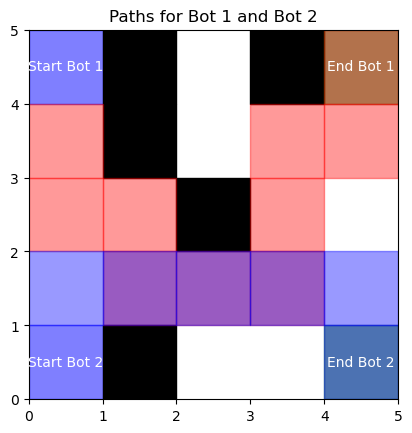


Commands for Bot 1:
Right()
Right()
Forward()
Left()
Forward()
Right()
Forward()
Left()
Forward()
Forward()
Left()
Forward()
Forward()
Right()
Forward()
Left()
Forward()

Commands for Bot 2:
Right()
Forward()
Forward()
Forward()
Forward()
Right()
Forward()

Time taken for Bot 1: 0.10 seconds
Time taken for Bot 2: 0.05 seconds
Total time taken: 0.15 seconds


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import heapq
import time  # Import time module

# Actions: up, down, left, right
actions = ['up', 'down', 'left', 'right']

# Define the warehouse grid
class WarehouseGrid:
    def __init__(self, grid):
        self.grid = grid
        self.rows = len(grid)
        self.cols = len(grid[0])

    def is_passable(self, row, col):
        return self.grid[row][col] != 'X'

    def neighbors(self, row, col):
        possible_moves = [(row - 1, col), (row + 1, col), (row, col - 1), (row, col + 1)]
        return [(r, c) for r, c in possible_moves if 0 <= r < self.rows and 0 <= c < self.cols and self.is_passable(r, c)]

# Initialize Q-table (rows x cols x actions)
class QLearningAgent:
    def __init__(self, grid, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=1000):
        self.grid = grid
        self.q_table = np.zeros((grid.rows, grid.cols, len(actions)))
        self.alpha = alpha    # Learning rate
        self.gamma = gamma    # Discount factor
        self.epsilon = epsilon  # Exploration-exploitation tradeoff
        self.episodes = episodes
        self.steps_taken = []  # To store the path taken by the bot

    # Reward function
    def reward(self, state):
        if self.grid.grid[state[0]][state[1]] == 'B':
            return 100  # Goal reward
        elif self.grid.grid[state[0]][state[1]] == 'X':
            return -10  # Obstacle penalty
        else:
            return -1   # Small penalty for each step

    # Get the next state given an action
    def next_state(self, state, action):
        row, col = state
        if action == 'up':
            return (max(row - 1, 0), col)
        elif action == 'down':
            return (min(row + 1, self.grid.rows - 1), col)
        elif action == 'left':
            return (row, max(col - 1, 0))
        elif action == 'right':
            return (row, min(col + 1, self.grid.cols - 1))

    # Q-learning algorithm
    def train(self, start, goal):
        for episode in range(self.episodes):
            state = start  # Starting state
            self.steps_taken = []  # Reset path for this episode
            done = False

            while not done:
                # Epsilon-greedy action selection
                if random.uniform(0, 1) < self.epsilon:
                    action_idx = random.randint(0, len(actions) - 1)  # Explore
                else:
                    action_idx = np.argmax(self.q_table[state[0], state[1]])  # Exploit

                action = actions[action_idx]
                new_state = self.next_state(state, action)

                # Store the action (row, column) taken
                self.steps_taken.append(new_state)

                # Get reward
                r = self.reward(new_state)

                # Update Q-table using Q-learning update rule
                old_value = self.q_table[state[0], state[1], action_idx]
                next_max = np.max(self.q_table[new_state[0], new_state[1]])
                self.q_table[state[0], state[1], action_idx] = old_value + self.alpha * (r + self.gamma * next_max - old_value)

                # Check if goal is reached
                if self.grid.grid[new_state[0]][new_state[1]] == 'B':
                    done = True

                state = new_state

        return self.q_table

    # Display the path followed by the bot
    def display_path(self):
        print("Path taken by the bot:")
        for step in self.steps_taken:
            print(f"Step: {step}")

# A* Algorithm to find a path
def a_star(grid, start, goal):
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_list:
        current = heapq.heappop(open_list)[1]

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        for neighbor in grid.neighbors(*current):
            tentative_g_score = g_score[current] + 1

            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return []

# Visualization function using matplotlib with path labels for each bot
def visualize_path_with_labels(grid, paths):
    fig, ax = plt.subplots()
    ax.set_xlim(0, grid.cols)
    ax.set_ylim(0, grid.rows)
    ax.set_aspect('equal')

    # Draw the grid with obstacles and start/goal points
    for r in range(grid.rows):
        for c in range(grid.cols):
            if grid.grid[r][c] == 'X':
                ax.add_patch(patches.Rectangle((c, grid.rows - r - 1), 1, 1, color='black'))
            elif grid.grid[r][c] == 'A':
                ax.add_patch(patches.Rectangle((c, grid.rows - r - 1), 1, 1, color='blue', alpha=0.5))
            elif grid.grid[r][c] == 'B':
                ax.add_patch(patches.Rectangle((c, grid.rows - r - 1), 1, 1, color='green', alpha=0.5))

    # Draw paths for the bots with labels
    path_colors = ['red', 'blue']
    bot_labels = ['Bot 1', 'Bot 2']
    start_positions = [(0, 0), (4, 0)]  # Correct start positions for Bot 1 and Bot 2

    for bot_idx, path in enumerate(paths):
        color = path_colors[bot_idx]
        label = bot_labels[bot_idx]
        start = start_positions[bot_idx]

        # Draw each step in the path
        for step in path:
            ax.add_patch(patches.Rectangle((step[1], grid.rows - step[0] - 1), 1, 1, color=color, alpha=0.4))
        
        # Label the start and end of each bot's path
        end = path[-1]
        ax.text(start[1] + 0.5, grid.rows - start[0] - 0.5, f'Start {label}', ha='center', va='center', color='white')
        ax.text(end[1] + 0.5, grid.rows - end[0] - 0.5, f'End {label}', ha='center', va='center', color='white')

    plt.title("Paths for Bot 1 and Bot 2")
    plt.draw()
    plt.show()

# Function to print movement commands for each bot
def print_bot_commands(steps):
    # Directions and how they change with left/right turns
    directions = ['up', 'right', 'down', 'left']  # Clockwise order
    direction_vectors = {'up': (-1, 0), 'right': (0, 1), 'down': (1, 0), 'left': (0, -1)}
    current_direction = 'up'  # Initial facing direction

    for i in range(1, len(steps)):
        current_pos = steps[i - 1]
        next_pos = steps[i]
        
        # Calculate the move vector
        move_vector = (next_pos[0] - current_pos[0], next_pos[1] - current_pos[1])
        
        # Find the direction needed to move
        for direction, vector in direction_vectors.items():
            if move_vector == vector:
                target_direction = direction
                break
        
        # Calculate turns needed to face the target direction
        current_index = directions.index(current_direction)
        target_index = directions.index(target_direction)
        turn_count = (target_index - current_index) % 4

        # Execute the turning commands
        if turn_count == 1:
            print("Right()")
        elif turn_count == 2:
            print("Right()")
            print("Right()")
        elif turn_count == 3:
            print("Left()")
        
        # Update the current facing direction
        current_direction = target_direction

        # Move forward
        print("Forward()")

# Test grid and pathfinding
warehouse = [
    ['A', 'X', '.', 'X', 'B'],
    ['.', 'X', '.', '.', '.'],
    ['.', '.', 'X', '.', '.'],
    ['.', '.', '.', '.', '.'],
    ['A', 'X', '.', '.', 'B']
]

# Define grid and agent
grid = WarehouseGrid(warehouse)

# Define start and goal points
bot1_start = (0, 0)  # Starting position of Bot 1
bot2_start = (4, 0)  # Starting position of Bot 2
bot1_goal = (0, 4)   # Goal position for Bot 1
bot2_goal = (4, 4)   # Goal position for Bot 2

# Train Q-learning agents for both bots
bot1_q_agent = QLearningAgent(grid)
start_time_bot1 = time.time()  # Start time for Bot 1 training
bot1_q_agent.train(bot1_start, bot1_goal)
end_time_bot1 = time.time()  # End time for Bot 1 training

bot2_q_agent = QLearningAgent(grid)
start_time_bot2 = time.time()  # Start time for Bot 2 training
bot2_q_agent.train(bot2_start, bot2_goal)
end_time_bot2 = time.time()  # End time for Bot 2 training

# Display paths
bot1_q_agent.display_path()
bot2_q_agent.display_path()

# Find optimal paths for visualization using A*
bot1_path = a_star(grid, bot1_start, bot1_goal)
bot2_path = a_star(grid, bot2_start, bot2_goal)

# Visualize paths with labels
visualize_path_with_labels(grid, [bot1_path, bot2_path])

# Print movement commands for both bots
print("\nCommands for Bot 1:")
print_bot_commands(bot1_path)

print("\nCommands for Bot 2:")
print_bot_commands(bot2_path)

# Print time taken for each bot
time_bot1 = end_time_bot1 - start_time_bot1
time_bot2 = end_time_bot2 - start_time_bot2
total_time = time_bot1 + time_bot2

print(f"\nTime taken for Bot 1: {time_bot1:.2f} seconds")
print(f"Time taken for Bot 2: {time_bot2:.2f} seconds")
print(f"Total time taken: {total_time:.2f} seconds")
